In [1]:
import pandas as pd
# import lightgbm as lgb
# import xgboost as xgb
# from catboost import CatBoostClassifier, Pool
from metrics import  accuracy
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.metrics import balanced_accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, SelectFromModel, RFE, VarianceThreshold, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier

from sklearn.feature_extraction.text import CountVectorizer
from experiments import *

# from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt

from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

simplefilter("ignore", category=ConvergenceWarning)
simplefilter("ignore", category=RuntimeWarning) 
simplefilter("ignore", category=UserWarning)

/home/rucinskij/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Data Load ##

In [2]:
RANDOM_STATE = 42

x_train_path = "./../../data/x_train.txt"
y_train_path = "./../../data/y_train.txt"

x_test_path = "./../../data/x_test.txt"


X = pd.read_csv(x_train_path, delim_whitespace=True, header=None)
y = pd.read_csv(y_train_path, delim_whitespace=True, header=None)
X_real_test = pd.read_csv(x_test_path, delim_whitespace=True, header=None)


/tmp/ipykernel_75525/1583141569.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X = pd.read_csv(x_train_path, delim_whitespace=True, header=None)
/tmp/ipykernel_75525/1583141569.py:10: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y = pd.read_csv(y_train_path, delim_whitespace=True, header=None)
/tmp/ipykernel_75525/1583141569.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_real_test = pd.read_csv(x_test_path, delim_whitespace=True, header=None)


## Grid search ##

In [4]:
cv = 5

model_grid_params = [
    {
        "model": QuadraticDiscriminantAnalysis,
        "params": [{}]
                
    },  
]
feature_selector_grid_params = [
    {"selector": RFE,
    "params": [{"estimator": i, "n_features_to_select":j, "step":1} for i in [SVC(kernel = 'linear',C = C, max_iter = 100)  for C in [0.1,1,10,100]] for j in [1,3,5]]
    },
]


In [5]:
results_dict = run_grid_search_cv(feature_selector_grid_params, model_grid_params, X, y, profit_scoring)

Running on: QuadraticDiscriminantAnalysis() and RFE(estimator=SVC(C=0.1, kernel='linear', max_iter=100), n_features_to_select=1)
scores: [930, 1070, 1110, 930, 850]
features: [[289], [300], [387], [168], [373]]
Running on: QuadraticDiscriminantAnalysis() and RFE(estimator=SVC(C=0.1, kernel='linear', max_iter=100), n_features_to_select=3)
scores: [840, 860, 850, 840, 730]
features: [[47, 289, 333], [191, 192, 300], [168, 387, 441], [168, 267, 478], [120, 373, 491]]
Running on: QuadraticDiscriminantAnalysis() and RFE(estimator=SVC(C=0.1, kernel='linear', max_iter=100), n_features_to_select=5)
scores: [710, 810, 670, 900, 760]
features: [[47, 58, 80, 289, 333], [52, 191, 192, 300, 408], [74, 168, 387, 395, 441], [168, 176, 267, 478, 486], [49, 120, 373, 476, 491]]
Running on: QuadraticDiscriminantAnalysis() and RFE(estimator=SVC(C=1, kernel='linear', max_iter=100), n_features_to_select=1)
scores: [930, 920, 970, 930, 890]
features: [[172], [22], [451], [168], [49]]
Running on: QuadraticDi

In [3]:
resaults_dict = {"RFE(estimator=SVC(C=0.1, kernel='linear', max_iter=100), n_features_to_select=1)": {'QuadraticDiscriminantAnalysis()': {'scores': [930,
    1070,
    1110,
    930,
    850],
   'features': [[289], [300], [387], [168], [373]]}},
 "RFE(estimator=SVC(C=0.1, kernel='linear', max_iter=100), n_features_to_select=3)": {'QuadraticDiscriminantAnalysis()': {'scores': [840,
    860,
    850,
    840,
    730],
   'features': [[47, 289, 333],
    [191, 192, 300],
    [168, 387, 441],
    [168, 267, 478],
    [120, 373, 491]]}},
 "RFE(estimator=SVC(C=0.1, kernel='linear', max_iter=100), n_features_to_select=5)": {'QuadraticDiscriminantAnalysis()': {'scores': [710,
    810,
    670,
    900,
    760],
   'features': [[47, 58, 80, 289, 333],
    [52, 191, 192, 300, 408],
    [74, 168, 387, 395, 441],
    [168, 176, 267, 478, 486],
    [49, 120, 373, 476, 491]]}},
 "RFE(estimator=SVC(C=1, kernel='linear', max_iter=100), n_features_to_select=1)": {'QuadraticDiscriminantAnalysis()': {'scores': [930,
    920,
    970,
    930,
    890],
   'features': [[172], [22], [451], [168], [49]]}},
 "RFE(estimator=SVC(C=1, kernel='linear', max_iter=100), n_features_to_select=3)": {'QuadraticDiscriminantAnalysis()': {'scores': [880,
    890,
    960,
    860,
    880],
   'features': [[58, 172, 447],
    [22, 434, 475],
    [168, 451, 467],
    [168, 267, 459],
    [39, 49, 467]]}},
 "RFE(estimator=SVC(C=1, kernel='linear', max_iter=100), n_features_to_select=5)": {'QuadraticDiscriminantAnalysis()': {'scores': [840,
    880,
    830,
    830,
    890],
   'features': [[58, 172, 264, 289, 447],
    [22, 143, 431, 434, 475],
    [18, 168, 451, 467, 494],
    [168, 267, 408, 419, 459],
    [39, 49, 208, 467, 484]]}},
 "RFE(estimator=SVC(C=10, kernel='linear', max_iter=100), n_features_to_select=1)": {'QuadraticDiscriminantAnalysis()': {'scores': [940,
    880,
    820,
    1010,
    950],
   'features': [[19], [269], [74], [30], [28]]}},
 "RFE(estimator=SVC(C=10, kernel='linear', max_iter=100), n_features_to_select=3)": {'QuadraticDiscriminantAnalysis()': {'scores': [980,
    810,
    880,
    970,
    790],
   'features': [[19, 447, 465],
    [52, 269, 486],
    [18, 74, 473],
    [30, 168, 266],
    [28, 225, 231]]}},
 "RFE(estimator=SVC(C=10, kernel='linear', max_iter=100), n_features_to_select=5)": {'QuadraticDiscriminantAnalysis()': {'scores': [870,
    810,
    850,
    850,
    740],
   'features': [[19, 47, 170, 447, 465],
    [52, 269, 431, 475, 486],
    [18, 74, 451, 467, 473],
    [30, 168, 266, 267, 459],
    [28, 225, 231, 298, 484]]}},
 "RFE(estimator=SVC(C=100, kernel='linear', max_iter=100), n_features_to_select=1)": {'QuadraticDiscriminantAnalysis()': {'scores': [1010,
    880,
    970,
    1010,
    950],
   'features': [[465], [269], [451], [459], [67]]}},
 "RFE(estimator=SVC(C=100, kernel='linear', max_iter=100), n_features_to_select=3)": {'QuadraticDiscriminantAnalysis()': {'scores': [800,
    810,
    930,
    970,
    860],
   'features': [[19, 47, 465],
    [52, 269, 486],
    [74, 451, 473],
    [266, 267, 459],
    [67, 231, 298]]}},
 "RFE(estimator=SVC(C=100, kernel='linear', max_iter=100), n_features_to_select=5)": {'QuadraticDiscriminantAnalysis()': {'scores': [870,
    810,
    850,
    850,
    730],
   'features': [[19, 47, 170, 447, 465],
    [52, 269, 431, 475, 486],
    [18, 74, 451, 467, 473],
    [30, 168, 266, 267, 459],
    [49, 67, 231, 298, 484]]}}}

In [8]:
avg_results_dict = apply_transform_to_res(results_dict, np.mean)
avg_df = pd.DataFrame(avg_results_dict).T
#avg_df.columns = [
    # "XGBoost:n=100:max_feat=3","XGBoost:n=200:max_feat=3", "XGBoost:n=300:max_feat=3",
    # "XGBoost:n=100:max_feat=6","XGBoost:n=200:max_feat=6","XGBoost:n=300:max_feat=6",
    # "XGBoost:n=100:max_feat=9","XGBoost:n=200:max_feat=9","XGBoost:n=300:max_feat=9"]
avg_df.style.background_gradient(cmap="Greens", low=0, high=1, axis=None)

,QuadraticDiscriminantAnalysis()
"RFE(estimator=SVC(C=0.1, kernel='linear', max_iter=100), n_features_to_select=1)",978.000000
"RFE(estimator=SVC(C=0.1, kernel='linear', max_iter=100), n_features_to_select=3)",824.000000
"RFE(estimator=SVC(C=0.1, kernel='linear', max_iter=100), n_features_to_select=5)",770.000000
"RFE(estimator=SVC(C=1, kernel='linear', max_iter=100), n_features_to_select=1)",928.000000
"RFE(estimator=SVC(C=1, kernel='linear', max_iter=100), n_features_to_select=3)",894.000000
"RFE(estimator=SVC(C=1, kernel='linear', max_iter=100), n_features_to_select=5)",854.000000
"RFE(estimator=SVC(C=10, kernel='linear', max_iter=100), n_features_to_select=1)",920.000000
"RFE(estimator=SVC(C=10, kernel='linear', max_iter=100), n_features_to_select=3)",886.000000
"RFE(estimator=SVC(C=10, kernel='linear', max_iter=100), n_features_to_select=5)",824.000000
"RFE(estimator=SVC(C=100, kernel='linear', max_iter=100), n_features_to_select=1)",964.000000


In [13]:
for key in list(results_dict.keys()):
    print(results_dict[key]['QuadraticDiscriminantAnalysis()']['features'])

[[289], [300], [387], [168], [373]]
[[47, 289, 333], [191, 192, 300], [168, 387, 441], [168, 267, 478], [120, 373, 491]]
[[47, 58, 80, 289, 333], [52, 191, 192, 300, 408], [74, 168, 387, 395, 441], [168, 176, 267, 478, 486], [49, 120, 373, 476, 491]]
[[172], [22], [451], [168], [49]]
[[58, 172, 447], [22, 434, 475], [168, 451, 467], [168, 267, 459], [39, 49, 467]]
[[58, 172, 264, 289, 447], [22, 143, 431, 434, 475], [18, 168, 451, 467, 494], [168, 267, 408, 419, 459], [39, 49, 208, 467, 484]]
[[19], [269], [74], [30], [28]]
[[19, 447, 465], [52, 269, 486], [18, 74, 473], [30, 168, 266], [28, 225, 231]]
[[19, 47, 170, 447, 465], [52, 269, 431, 475, 486], [18, 74, 451, 467, 473], [30, 168, 266, 267, 459], [28, 225, 231, 298, 484]]
[[465], [269], [451], [459], [67]]
[[19, 47, 465], [52, 269, 486], [74, 451, 473], [266, 267, 459], [67, 231, 298]]
[[19, 47, 170, 447, 465], [52, 269, 431, 475, 486], [18, 74, 451, 467, 473], [30, 168, 266, 267, 459], [49, 67, 231, 298, 484]]


/tmp/ipykernel_1506/1108168634.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds')


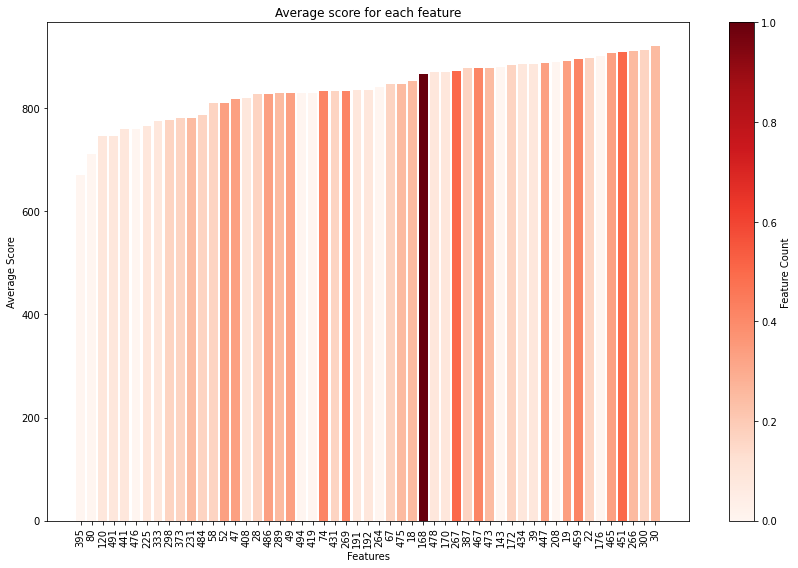

In [36]:
import numpy as np
import matplotlib.pyplot as plt

flat_features = list(itertools.chain.from_iterable(itertools.chain.from_iterable(resaults_dict[key]['QuadraticDiscriminantAnalysis()']['features'] for key in results_dict)))

feature_counts = Counter(map(str, flat_features))
feature_scores = {feature: {"total": 0, "count": 0} for feature in feature_counts.keys()}

for selector_str in results_dict:
    for model_str in results_dict[selector_str]:
        for features, score in zip(results_dict[selector_str][model_str]["features"], results_dict[selector_str][model_str]["scores"]):
            for feature in features:
                feature_scores[str(feature)]["total"] += score
                feature_scores[str(feature)]["count"] += 1

feature_avg_scores = {feature: scores["total"] / scores["count"] for feature, scores in feature_scores.items()}

feature_avg_scores_sorted = dict(sorted(feature_avg_scores.items(), key=lambda item: item[1]))

sorted_counts = [feature_counts[feature] for feature in feature_avg_scores_sorted.keys()]

counts = np.array(sorted_counts)
normalized_counts = (counts - counts.min()) / (counts.max() - counts.min())

cmap = plt.cm.get_cmap('Reds')

fig, ax = plt.subplots(figsize=(12, 8))
sc = ax.bar(feature_avg_scores_sorted.keys(), feature_avg_scores_sorted.values(), color=cmap(normalized_counts))
plt.xlabel('Features')
plt.ylabel('Average Score')
plt.title('Average score for each feature')
plt.xticks(rotation='vertical')
plt.tight_layout()

fig.colorbar(plt.cm.ScalarMappable(cmap=cmap), ax=ax, label='Feature Count')  # Add a colorbar
plt.show()

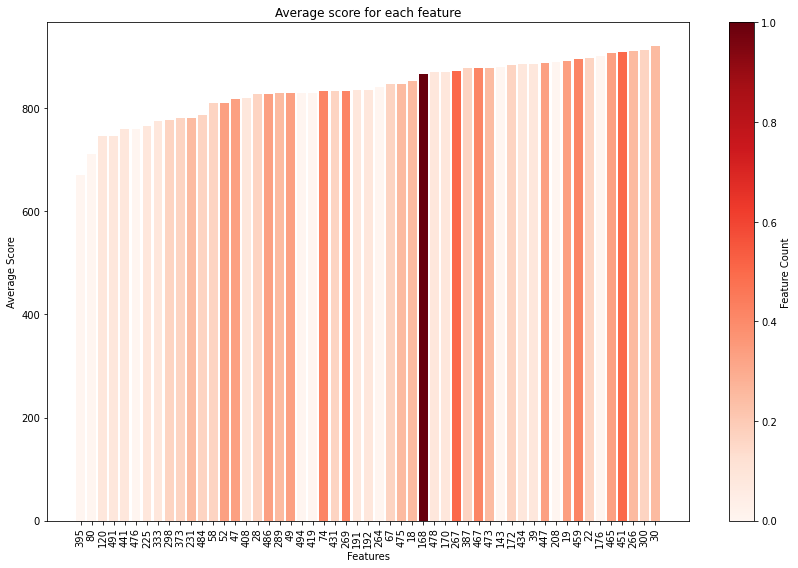

In [4]:
create_feature_score_plot(resaults_dict)

## First dumb try ##

In [7]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

In [8]:

selected_features = []
max_profit = 0

for feature in X_train.columns:
    selected_features.append(feature)
    
    model = RandomForestClassifier(random_state=RANDOM_STATE)
    model.fit(X_train[selected_features], y_train)
    
    y_pred = model.predict(X_test[selected_features])
    y_pred = y_pred%2
    correct_predictions = ((y_pred == 1) & list((y_test == 1)[0])).sum()
    profit = correct_predictions * 10 - len(selected_features) * 200
    
    if profit > max_profit:
        max_profit = profit

    else:
        selected_features.remove(feature)

print(selected_features)

[0]


In [9]:
max_profit

2610

In [10]:
y_test.sum()*10

0    5080
dtype: int64

### More analysis ###

<Axes: >

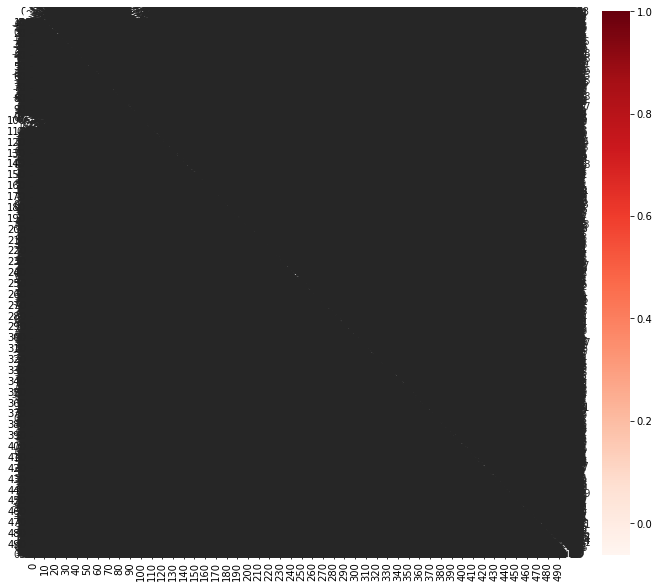

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
cor = X.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

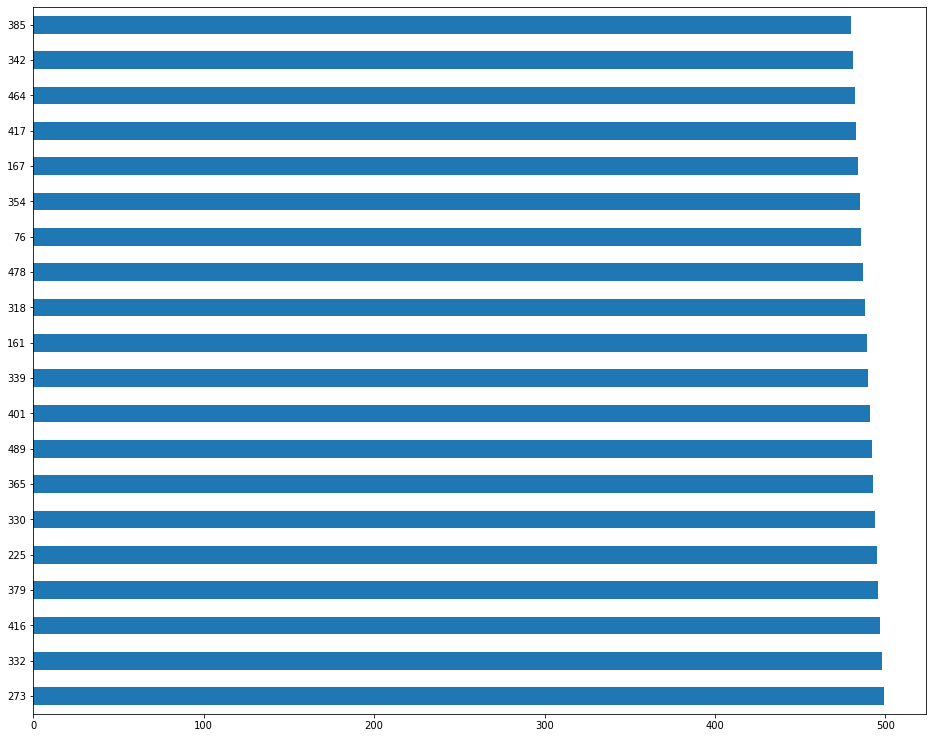

In [10]:
from skfeature.function.similarity_based import fisher_score
import matplotlib.pyplot as plt

ranks = fisher_score.fisher_score(X.values, y.values.ravel())
plt.figure(figsize=(16, 13))
feat_importances = pd.Series(ranks, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

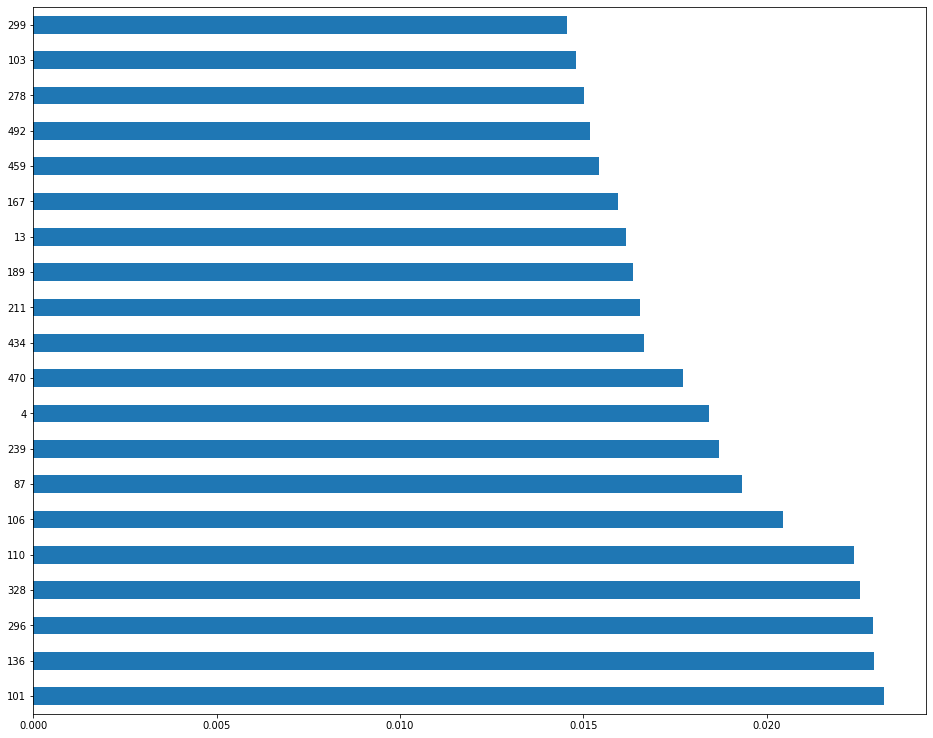

In [11]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X, y.values.ravel())
plt.figure(figsize=(16, 13))
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()